# IBM Data Science, Capstone Project

## Analyzing Rental Property Capitalization Rates and Venues by Neighborhood of Selected Regions


### Introduction

(Web-Scraping, Foursquare API, Folium Map, Kmeans Clustering & Machine Learning)

In this exercise we will analyze housing and rent prices of multiple neighborhood in the Great Boston area of Massachusetts.  We will make a comparison that is data driven to help investors gain insight in a manner of relative evaluation at the neighborhoods level.  We will calculate rental capitalization rates (cap rates) by taking the by-neighborhood average of recently sold homes prices and recently rented rent prices.  We will also look to develop an indicator of neighborhood rental desirability that is measured by the neighborhood's available venues within its close proximity.  Regression analysis of cap rates and clustered neighbors segmented by venue types and quantity will also be explored.

#### Methods that will be used: 

We will convert addresses into their equivalent latitude and longitude values. 

We will use the Foursquare API to explore neighborhoods of selected regions. We'll use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. The k-means clustering algorithm will be used to complete this task. Finally, we'll the Folium library to visualize the neighborhoods and their emerging clusters.

Recent MLS data of rental and home sale price will be used to extrapolate capitalization rates by neighborhoods.  We will extract this data directly from MLS data base and import to a pandas data frame for analysis. (Another option would be to scrape data from Website such as Zillow or Redfin. We will decide on which is the better method as we approach this segment of the analysis.)

Once the data is formatted into a proper structure, we will explore and cluster various neighborhoods.  Ultimately we will create a mapping visualization tool to help bringing insight to investors whom would be interested in acquiring rental property, purhaps of an unfamiliar region to them.  Folium will again be used to map cap rates and venues availability.  Cap rates will be the measure of profitability and Venues as comparison of neighborhood types and indicator of desirability by potential tenants.  That is, the more the venues that are accessible the more desirable a neighborhood to reside within.  We will also provide some regression analysis comparing neighborhood cap rates vs clustered neighborhood types to see if correlations exists.




#### First we download and import all dependencies

In [2]:
!pip install beautifulsoup4

     |████████████████████████████████| 122kB 6.3MB/s eta 0:00:01


In [2]:
!pip install --ignore-installed BeautifulSoup4

     |████████████████████████████████| 122kB 5.9MB/s eta 0:00:01


In [3]:
!pip install --ignore-installed bs4

  Using cached https://files.pythonhosted.org/packages/66/25/ff030e2437265616a1e9b25ccc864e0371a0bc3adb7c5a404fd661c6f4f6/beautifulsoup4-4.9.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6f/8f/457f4a5390eeae1cc3aeab89deb7724c965be841ffca6cfca9197482e470/soupsieve-2.0.1-py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [59]:
!pip install --user lxml

In [55]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [212]:
!pip install --ignore-installed requests

  Using cached https://files.pythonhosted.org/packages/45/1e/0c169c6a5381e241ba7404532c16a21d86ab872c9bed8bdcd4c423954103/requests-2.24.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl
     |████████████████████████████████| 163kB 6.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/9f/f0/a391d1463ebb1b233795cabfc0ef38d3db4442339de68f847026199e69d7/urllib3-1.25.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
ERROR: ibm-cos-sdk-core 2.6.3 has requirement docutils<0.16,>=0.10, but you'll have docutils 0.16 which is incompatible.


In [5]:
!pip install geocoder

     |████████████████████████████████| 102kB 6.5MB/s ta 0:00:011
     |████████████████████████████████| 829kB 7.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


In [7]:
!pip install geopy

     |████████████████████████████████| 112kB 7.0MB/s eta 0:00:01


In [115]:
!pip install --user folium

In [215]:
!pip install --ignore-installed sklearn

  Using cached https://files.pythonhosted.org/packages/5c/a1/273def87037a7fb010512bbc5901c31cfddfca8080bc63b42b26e3cc55b3/scikit_learn-0.23.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b1/9a/7d474ba0860a41f771c9523d8c4ea56b084840b5ca4092d96bdee8a3b684/numpy-1.19.1-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/51/dd/0e015051b4a27ec5a58b02ab774059f3289a94b0906f880a3f9507e74f38/joblib-0.16.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/a8/f4c66eb529bb252d50e83dbf2909c6502e2f857550f22571ed8556f62d95/scipy-1.5.2-cp36-cp36m-manylinux1_x86_64.whl


In [9]:
!pip install --ignore-installed KMeans

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/10/05/77/2735fd2f7a0b4d86cb7a83be2a56807cf706d5d27f742c6482
Successfully built KMeans


In [8]:
!pip install --user KMeans

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/10/05/77/2735fd2f7a0b4d86cb7a83be2a56807cf706d5d27f742c6482
Successfully built KMeans


In [10]:
!pip install scipy

In [11]:
!pip install scikit-learn==0.20.0

     |████████████████████████████████| 5.3MB 5.7MB/s eta 0:00:01     |██                              | 348kB 5.7MB/s eta 0:00:01     |██████                          | 1.0MB 5.7MB/s eta 0:00:01     |██████████████████████▋         | 3.8MB 5.7MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [11]:
!pip3 install yellowbrick

     |████████████████████████████████| 263 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 484 kB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.7 MB 58.7 MB/s eta 0:00:01    |█                               | 829 kB 44.3 MB/s eta 0:00:01     |██████▏                         | 4.9 MB 44.3 MB/s eta 0:00:01MB/s eta 0:00:01  | 13.5 MB 44.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 33.5 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 41.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 45.1 MB/s eta 0:00:01
     |████████████████████████████████| 92 kB 221 kB/s  eta 0:00:01


In [13]:
!pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/13/95/a14e4fdfb8b1c8753bbe74a626e910a98219ef9c87c6763585bbd30d84cf/yellowbrick-1.1-py3-none-any.whl


In [14]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import for scraping data from web
from bs4 import BeautifulSoup 
import requests
import csv

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import geocoder #import the geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans
import kmeans
from sklearn.pipeline import make_pipeline
from yellowbrick.cluster import KElbowVisualizer


print('Libraries imported.')

Libraries imported.


#### Lets first import some data to get us started. 

#### First we'll import MLS data of recently rented and sold residential listings to assert rent price and sold price data points.  
#### We'll wrangle and clean the data as well; create data frame with only needed columns and remove nan's.
#### Let's also have a look at the level of nieghborhood categorization that we could use for geolocation and KMeans Clustering.

In [90]:
sold_df = pd.read_excel(r'Sold Actual_BOS.xlsx', sheet_name='Sold Actual')
sold_df = sold_df[['AREA', 'TOWN', 'STATE', 'PROP_TYPE', 'NO_UNITS_MF', 'NO_BEDROOMS', 'SALE_PRICE', 'MARKET_TIME_PROPERTY']]

sold_df.rename({'MARKET_TIME_PROPERTY': 'SOLD_DOM'}, axis=1, inplace=True)

sold_df.head(10).style.format({'SALE_PRICE':'{:,.0f}'})

,AREA,TOWN,STATE,PROP_TYPE,NO_UNITS_MF,NO_BEDROOMS,SALE_PRICE,SOLD_DOM
0,nan,"Boston, MA",MA,MF,2.000000,7,"970,000",128
1,nan,"Boston, MA",MA,MF,2.000000,6,"740,000",127
2,nan,"Boston, MA",MA,CC,nan,1,"740,000",117
3,nan,"Boston, MA",MA,CC,nan,2,"455,000",21
4,nan,"Boston, MA",MA,CC,nan,2,"487,000",16
5,nan,"Boston, MA",MA,CC,nan,3,"700,000",122
6,nan,"Boston, MA",MA,CC,nan,2,"595,000",139
7,nan,"Boston, MA",MA,CC,nan,2,"465,000",77
8,nan,"Boston, MA",MA,MF,2.000000,5,"600,000",113
9,nan,"Boston, MA",MA,CC,nan,2,"1,115,000",202


#### Column PROP_TYPE indicates that any listed MF is a multi unit property.  
#### We'll normalize this here to single unit and also normalize bedroom counts.  
#### Later we will see that lines with fractional bedroom counts will be excluded.  This will make for a better data set that reflects truer values.

In [91]:
sold_df.loc[sold_df['PROP_TYPE'] == 'MF', 'SALE_PRICE'] = sold_df['SALE_PRICE']/sold_df['NO_UNITS_MF']
sold_df.loc[sold_df['PROP_TYPE'] == 'MF', 'NO_BEDROOMS'] = sold_df['NO_BEDROOMS']/sold_df['NO_UNITS_MF']

sold_df=sold_df.drop(['NO_UNITS_MF'], axis=1)

sold_df.head(10).style.format({'SALE_PRICE':'{:,.0f}'})

,AREA,TOWN,STATE,PROP_TYPE,NO_BEDROOMS,SALE_PRICE,SOLD_DOM
0,nan,"Boston, MA",MA,MF,3.500000,"485,000",128
1,nan,"Boston, MA",MA,MF,3.000000,"370,000",127
2,nan,"Boston, MA",MA,CC,1.000000,"740,000",117
3,nan,"Boston, MA",MA,CC,2.000000,"455,000",21
4,nan,"Boston, MA",MA,CC,2.000000,"487,000",16
5,nan,"Boston, MA",MA,CC,3.000000,"700,000",122
6,nan,"Boston, MA",MA,CC,2.000000,"595,000",139
7,nan,"Boston, MA",MA,CC,2.000000,"465,000",77
8,nan,"Boston, MA",MA,MF,2.500000,"300,000",113
9,nan,"Boston, MA",MA,CC,2.000000,"1,115,000",202


#### Column Area will be used to indicate nighborhoods within each town.  
#### Not all Towns or lines items have Area's indicated.  We'll add Town to any blank Area lines.  
#### This will result in displaying cap rate averages for Towns with out Area indicated and for any items with out Area inputs.  
#### There will always be significant amount of these so we will not want to loose these data points.

In [92]:
sold_df.loc[sold_df['AREA'].isnull(), 'AREA'] = sold_df['TOWN']

sold_df.head(10).style.format({'SALE_PRICE':'{:,.0f}'})

,AREA,TOWN,STATE,PROP_TYPE,NO_BEDROOMS,SALE_PRICE,SOLD_DOM
0,"Boston, MA","Boston, MA",MA,MF,3.500000,"485,000",128
1,"Boston, MA","Boston, MA",MA,MF,3.000000,"370,000",127
2,"Boston, MA","Boston, MA",MA,CC,1.000000,"740,000",117
3,"Boston, MA","Boston, MA",MA,CC,2.000000,"455,000",21
4,"Boston, MA","Boston, MA",MA,CC,2.000000,"487,000",16
5,"Boston, MA","Boston, MA",MA,CC,3.000000,"700,000",122
6,"Boston, MA","Boston, MA",MA,CC,2.000000,"595,000",139
7,"Boston, MA","Boston, MA",MA,CC,2.000000,"465,000",77
8,"Boston, MA","Boston, MA",MA,MF,2.500000,"300,000",113
9,"Boston, MA","Boston, MA",MA,CC,2.000000,"1,115,000",202


In [93]:
#Remove "#" should we need to add address lines back in
#we need to cleen up the address line for geolocation
#sold_df['ADDRESS'] = sold_df['ADDRESS'].str.split('U:').str[0]

#sold_df.head(10).style.format({'SALE_PRICE':'{:,.0f}'})

In [94]:
sold_df.tail()

,AREA,TOWN,STATE,PROP_TYPE,NO_BEDROOMS,SALE_PRICE,SOLD_DOM
4197,Winter Hill,"Somerville, MA",MA,CC,1.000000,401500.000000,2
4198,Winter Hill,"Somerville, MA",MA,CC,2.000000,775000.000000,7
4199,Winter Hill,"Somerville, MA",MA,MF,2.000000,400000.000000,2
4200,Winter Hill,"Somerville, MA",MA,MF,2.333333,416666.666667,6
4201,Winter Hill,"Somerville, MA",MA,CC,1.000000,556000.000000,12


In [95]:
sold_df.shape

(4202, 7)

In [96]:
#remove lines with missing sale price of no of bedrooms
sold_df = sold_df.dropna(subset=['NO_BEDROOMS', 'SALE_PRICE'])
sold_df[ (sold_df['NO_BEDROOMS'].isnull()) | (sold_df['SALE_PRICE'].isnull()) ]

,AREA,TOWN,STATE,PROP_TYPE,NO_BEDROOMS,SALE_PRICE,SOLD_DOM


In [97]:
sold_df.shape

(4202, 7)

#### Sold data is now ready to be used.  Next we'll prepare rental data.

In [99]:
#RENT DISPLAYED IN MONTLY VALUE
rent_df = pd.read_excel(r'Rent Actual_BOS.xlsx', sheet_name='Rent Actual')
rent_df = rent_df[['AREA','TOWN', 'STATE', 'NO_BEDROOMS', 'SALE_PRICE', 'MARKET_TIME_PROPERTY']]

rent_df.rename({'SALE_PRICE': 'RENT_PRICE'}, axis=1, inplace=True)
rent_df.rename({'MARKET_TIME_PROPERTY': 'RENT_DOM'}, axis=1, inplace=True)

rent_df.tail ()

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_PRICE,RENT_DOM
8870,Winter Hill,"Somerville, MA",MA,4,3800.0,60
8871,Winter Hill,"Somerville, MA",MA,3,3300.0,44
8872,Winter Hill,"Somerville, MA",MA,4,3800.0,104
8873,Winter Hill,"Somerville, MA",MA,2,2250.0,116
8874,Winter Hill,"Somerville, MA",MA,2,2850.0,26


#### As before some lines will have empty AREA cells, well add TOWN as to not loose these data points.  They serve well as average to the town its self, should the town even have that layer of data.

In [100]:
rent_df.loc[rent_df['AREA'].isnull(), 'AREA'] = rent_df['TOWN']

rent_df.head().style.format({'RENT_PRICE':'{:,.0f}'})

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_PRICE,RENT_DOM
0,"Boston, MA","Boston, MA",MA,2,"3,800",9
1,"Boston, MA","Boston, MA",MA,4,"6,200",6
2,"Boston, MA","Boston, MA",MA,2,"2,800",5
3,"Boston, MA","Boston, MA",MA,1,"1,600",7
4,"Boston, MA","Boston, MA",MA,1,"1,950",6


In [101]:
#Remove "#" should we need to add address lines back in
#rent_df['ADDRESS'] = rent_df['ADDRESS'].str.split('U:').str[0]
#rent_df.head(10).style.format({'RENT_PRICE':'{:,.0f}'})

In [102]:
rent_df.shape

(8875, 6)

In [103]:
rent_df = rent_df.dropna(subset=['NO_BEDROOMS', 'RENT_PRICE'])
rent_df[ (rent_df['NO_BEDROOMS'].isnull()) | (rent_df['RENT_PRICE'].isnull()) ]

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_PRICE,RENT_DOM


In [104]:
rent_df.shape

(8875, 6)

In [105]:
print(sold_df.dtypes)

AREA            object
TOWN            object
STATE           object
PROP_TYPE       object
NO_BEDROOMS    float64
SALE_PRICE     float64
SOLD_DOM         int64
dtype: object


In [106]:
print(rent_df.dtypes)

AREA            object
TOWN            object
STATE           object
NO_BEDROOMS      int64
RENT_PRICE     float64
RENT_DOM         int64
dtype: object


In [111]:
convert_dict = {'NO_BEDROOMS': int, 'SALE_PRICE': int, 'SOLD_DOM': int }
sold_df = sold_df.astype(convert_dict)
print(sold_df.dtypes)

AREA           object
TOWN           object
STATE          object
PROP_TYPE      object
NO_BEDROOMS     int64
SALE_PRICE      int64
SOLD_DOM        int64
dtype: object


In [112]:
convert_dict = {'NO_BEDROOMS': int, "RENT_PRICE": int, 'RENT_DOM': int}
rent_df = rent_df.astype(convert_dict)
print(rent_df.dtypes)

AREA           object
TOWN           object
STATE          object
NO_BEDROOMS     int64
RENT_PRICE      int64
RENT_DOM        int64
dtype: object


#### Both sold and rent data sets are ready.  Let's combine the two data sets in to one.

In [113]:
sold_rent_df = pd.concat([sold_df,rent_df], axis=0, ignore_index=False)
sold_rent_df.head()

,AREA,TOWN,STATE,PROP_TYPE,NO_BEDROOMS,SALE_PRICE,SOLD_DOM,RENT_PRICE,RENT_DOM
0,"Boston, MA","Boston, MA",MA,MF,3,485000.0,128.0,NaN,NaN
1,"Boston, MA","Boston, MA",MA,MF,3,370000.0,127.0,NaN,NaN
2,"Boston, MA","Boston, MA",MA,CC,1,740000.0,117.0,NaN,NaN
3,"Boston, MA","Boston, MA",MA,CC,2,455000.0,21.0,NaN,NaN
4,"Boston, MA","Boston, MA",MA,CC,2,487000.0,16.0,NaN,NaN


In [114]:
sold_rent_df.shape

(13077, 9)

In [115]:
sold_rent_df.dtypes

AREA            object
TOWN            object
STATE           object
PROP_TYPE       object
NO_BEDROOMS      int64
SALE_PRICE     float64
SOLD_DOM       float64
RENT_PRICE     float64
RENT_DOM       float64
dtype: object

In [124]:
sold_rent_df_pvt = pd.pivot_table(sold_rent_df, values=['SALE_PRICE', 'RENT_PRICE', 'RENT_DOM'], 
                                  index=['AREA', 'TOWN', 'STATE', 'NO_BEDROOMS'], 
                                  aggfunc={'SALE_PRICE': [np.mean, 'count'], 'RENT_PRICE': [np.mean, 'count'], 'RENT_DOM': [np.mean]}).reset_index()


sold_rent_df_pvt.columns = sold_rent_df_pvt.columns.droplevel(-1)

sold_rent_df_pvt.columns.values[5] = 'RENTAL_COUNT'
sold_rent_df_pvt.columns.values[7] = 'SOLD_COUNT'


sold_rent_df_pvt.head()

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_DOM,RENTAL_COUNT,RENT_PRICE,SOLD_COUNT,SALE_PRICE
0,Adams Shore,"Quincy, MA",MA,2,36.333333,3,2350.0,0,NaN
1,Adams Shore,"Quincy, MA",MA,3,5.000000,1,2800.0,0,NaN
2,Agassiz,"Cambridge, MA",MA,0,52.000000,1,1700.0,0,NaN
3,Agassiz,"Cambridge, MA",MA,1,7.000000,1,2400.0,1,600000.0
4,Agassiz,"Cambridge, MA",MA,2,42.000000,3,3900.0,2,830000.0


In [125]:
sold_rent_df_pvt=sold_rent_df_pvt
sold_rent_df_pvt.shape

(721, 9)

In [126]:
sold_rent_df_pvt = sold_rent_df_pvt.dropna(subset=['RENT_PRICE', 'SALE_PRICE', 'NO_BEDROOMS'])
sold_rent_df_pvt[ (sold_rent_df_pvt['RENT_PRICE'].isnull()) | (sold_rent_df_pvt['SALE_PRICE'].isnull()) | (sold_rent_df_pvt['NO_BEDROOMS'].isnull()) ]

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_DOM,RENTAL_COUNT,RENT_PRICE,SOLD_COUNT,SALE_PRICE


In [127]:
sold_rent_df_pvt.shape

(392, 9)

In [128]:
convert_dict = {"SALE_PRICE": int, "RENT_PRICE": int}
sold_rent_df_pvt = sold_rent_df_pvt.astype(convert_dict)
print(sold_rent_df_pvt.dtypes)

AREA             object
TOWN             object
STATE            object
NO_BEDROOMS       int64
RENT_DOM        float64
RENTAL_COUNT      int64
RENT_PRICE        int64
SOLD_COUNT        int64
SALE_PRICE        int64
dtype: object


#### Next we will create data frame that calculates Capitalization Rate (Cap Rate) 
#### Cap Rates = Net Operating Income (NOI) / Acquistion Cost
#### NOI = Total Revenue (Total Rents Collected) - Operations Cost (Ops Cost)
#### Ops Cost = Taxes + Homeowner's Insurance + Utilities (Shared Utilities usually Water & Common Area) + Maintenance and Vacancy (as % of total rent)

In [129]:
#Define assumptions to be used to derive cap rates
#tax rate source: "https://joeshimkus.com/MA-Tax-Rates.aspx" and will be calculated per town via downloaded data converted to data frame

assessor_lag = 1-.15 # to reflect anual 7.5% increase x 2 years value that should be excluded due to 2 year assessor's lag
ins_rate = .004 #per $1 sale price, this is an average used by redfin
water_rate = 380 #Avg cost of water at $380 a yer per person, 48 gal per person per day, we multiply 380 per bedroom, source: "http://archive.boston.com/yourtown/specials/water/massachusetts_water_usage_map/"
maint_vac_rate = .10 # We will assume a 10% mainenance and vacany cost x total rents

opscost_df = pd.DataFrame({'ASSESSOR LAG':[assessor_lag],'INSURANCE':[ins_rate], 'UTILITIES':[water_rate], 'MAINT VACANCY':[maint_vac_rate]})
opscost_df

,ASSESSOR LAG,INSURANCE,UTILITIES,MAINT VACANCY
0,0.85,0.004,380,0.1


In [130]:
print(opscost_df.dtypes)

ASSESSOR LAG     float64
INSURANCE        float64
UTILITIES          int64
MAINT VACANCY    float64
dtype: object


In [131]:
#Bring in prop tax rate per town
#Scrape prop taxpostal code and nighborhood data for Toronto from Wikipedia
url = "https://joeshimkus.com/MA-Tax-Rates.aspx"
source = requests.get(url)
tax_html = BeautifulSoup(source.content)


In [132]:
soup = BeautifulSoup(source.text, 'html5lib')

In [133]:
table = soup.find_all('table')[0]

In [134]:
dfs = pd.read_html(url, flavor='html5lib')

In [135]:
# import the HTML table into a DataFrame
#dfs = pd.read_html(str(table), header = 0) # this one worked than starting asking to install lxml, which was already installed, said same even after fresh install, we use the line above as an alternative

In [136]:
# assign the data frame to pandas dataframe
tax_df = dfs[0]

In [137]:
tax_df.head()

,Town,ResidentialTax Rate,CommercialTax Rate
0,Abington,17.00,17.00
1,Acton,19.24,19.24
2,Acushnet,13.94,17.95
3,Adams,21.88,25.99
4,Agawam,16.83,31.61


In [138]:
caprate_df = sold_rent_df_pvt

caprate_df['INSURANCE'] = caprate_df['SALE_PRICE'].multiply(opscost_df.loc[0,'INSURANCE'])
caprate_df['UTILITIES'] = caprate_df['NO_BEDROOMS'].multiply(opscost_df.loc[0,'UTILITIES']) #IMPROVE CALC TO ONLY ADD UTILITIES TO MULTI FAMILY
#ANNUALIZE RENT PRICE FROM MONTLY TO YEARLY
caprate_df['RENT_YRLY'] = caprate_df['RENT_PRICE'].multiply(12)
caprate_df['MAINT_VACANCY'] = caprate_df['RENT_YRLY'].multiply(opscost_df.loc[0,'MAINT VACANCY'])

caprate_df.head()

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_DOM,RENTAL_COUNT,RENT_PRICE,SOLD_COUNT,SALE_PRICE,INSURANCE,UTILITIES,RENT_YRLY,MAINT_VACANCY
3,Agassiz,"Cambridge, MA",MA,1,7.000,1,2400,1,600000,2400.0,380,28800,2880.0
4,Agassiz,"Cambridge, MA",MA,2,42.000,3,3900,2,830000,3320.0,760,46800,4680.0
5,Agassiz,"Cambridge, MA",MA,3,46.500,2,3900,1,1785000,7140.0,1140,46800,4680.0
6,Agassiz,"Cambridge, MA",MA,4,23.500,2,6250,2,1982500,7930.0,1520,75000,7500.0
7,Allston,"Boston, MA",MA,0,34.625,8,1402,1,265000,1060.0,0,16824,1682.4


In [139]:
caprate_df = sold_rent_df_pvt
caprate_df[['CITY','STATE_1']] = caprate_df.TOWN.str.split(", ",expand=True,)

caprate_df.head()

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_DOM,RENTAL_COUNT,RENT_PRICE,SOLD_COUNT,SALE_PRICE,INSURANCE,UTILITIES,RENT_YRLY,MAINT_VACANCY,CITY,STATE_1
3,Agassiz,"Cambridge, MA",MA,1,7.000,1,2400,1,600000,2400.0,380,28800,2880.0,Cambridge,MA
4,Agassiz,"Cambridge, MA",MA,2,42.000,3,3900,2,830000,3320.0,760,46800,4680.0,Cambridge,MA
5,Agassiz,"Cambridge, MA",MA,3,46.500,2,3900,1,1785000,7140.0,1140,46800,4680.0,Cambridge,MA
6,Agassiz,"Cambridge, MA",MA,4,23.500,2,6250,2,1982500,7930.0,1520,75000,7500.0,Cambridge,MA
7,Allston,"Boston, MA",MA,0,34.625,8,1402,1,265000,1060.0,0,16824,1682.4,Boston,MA


In [140]:
caprate_df = caprate_df.merge(tax_df, how='left', left_on=["CITY"], right_on=["Town"])

caprate_df.head()

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_DOM,RENTAL_COUNT,RENT_PRICE,SOLD_COUNT,SALE_PRICE,INSURANCE,UTILITIES,RENT_YRLY,MAINT_VACANCY,CITY,STATE_1,Town,ResidentialTax Rate,CommercialTax Rate
0,Agassiz,"Cambridge, MA",MA,1,7.000,1,2400,1,600000,2400.0,380,28800,2880.0,Cambridge,MA,Cambridge,5.75,12.68
1,Agassiz,"Cambridge, MA",MA,2,42.000,3,3900,2,830000,3320.0,760,46800,4680.0,Cambridge,MA,Cambridge,5.75,12.68
2,Agassiz,"Cambridge, MA",MA,3,46.500,2,3900,1,1785000,7140.0,1140,46800,4680.0,Cambridge,MA,Cambridge,5.75,12.68
3,Agassiz,"Cambridge, MA",MA,4,23.500,2,6250,2,1982500,7930.0,1520,75000,7500.0,Cambridge,MA,Cambridge,5.75,12.68
4,Allston,"Boston, MA",MA,0,34.625,8,1402,1,265000,1060.0,0,16824,1682.4,Boston,MA,Boston,10.56,24.92


In [141]:
caprate_df['TAX_RATE'] = caprate_df['ResidentialTax Rate'].divide(1000)
caprate_df['TAX'] = caprate_df['SALE_PRICE'].multiply(caprate_df['TAX_RATE']).multiply(opscost_df.loc[0,'ASSESSOR LAG'])

caprate_df['OPS_COST'] = caprate_df['TAX'] + caprate_df['INSURANCE'] + caprate_df['UTILITIES'] + caprate_df['MAINT_VACANCY']
caprate_df['NOI'] = caprate_df['RENT_YRLY'] - caprate_df['OPS_COST']
caprate_df['CAP_RATE'] = caprate_df['NOI'] / (caprate_df['SALE_PRICE'])

caprate_df=caprate_df.drop(columns=['CITY','STATE_1', 'Town', 'ResidentialTax Rate', 'CommercialTax Rate'])

caprate_df.head()

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_DOM,RENTAL_COUNT,RENT_PRICE,SOLD_COUNT,SALE_PRICE,INSURANCE,UTILITIES,RENT_YRLY,MAINT_VACANCY,TAX_RATE,TAX,OPS_COST,NOI,CAP_RATE
0,Agassiz,"Cambridge, MA",MA,1,7.000,1,2400,1,600000,2400.0,380,28800,2880.0,0.00575,2932.50000,8592.50000,20207.50000,0.033679
1,Agassiz,"Cambridge, MA",MA,2,42.000,3,3900,2,830000,3320.0,760,46800,4680.0,0.00575,4056.62500,12816.62500,33983.37500,0.040944
2,Agassiz,"Cambridge, MA",MA,3,46.500,2,3900,1,1785000,7140.0,1140,46800,4680.0,0.00575,8724.18750,21684.18750,25115.81250,0.014070
3,Agassiz,"Cambridge, MA",MA,4,23.500,2,6250,2,1982500,7930.0,1520,75000,7500.0,0.00575,9689.46875,26639.46875,48360.53125,0.024394
4,Allston,"Boston, MA",MA,0,34.625,8,1402,1,265000,1060.0,0,16824,1682.4,0.01056,2378.64000,5121.04000,11702.96000,0.044162


In [142]:
#### This data frame provides insgihtful data.  We will extract it for future ref
#! pip install openpyxl

In [143]:
#from openpyxl import Workbook

#caprate_df.to_excel('caprate_df.xlsx')

### Let's distil caprates by area and next add geo locator.

In [146]:
caprate_df_pvt = pd.pivot_table(caprate_df, values=['RENT_DOM','CAP_RATE'], index=['AREA', 'TOWN', 'STATE'], aggfunc={'RENT_DOM': [np.mean], 'CAP_RATE': [np.mean]})

caprate_df_pvt.columns = caprate_df_pvt.columns.droplevel(-1)




caprate_df_pvt.head()

,,,CAP_RATE,RENT_DOM
AREA,TOWN,STATE,,
Agassiz,"Cambridge, MA",MA,0.028272,29.750000
Allston,"Boston, MA",MA,0.039704,38.238485
Area 4-The Port,"Cambridge, MA",MA,0.030950,41.000000
Assembly Square,"Somerville, MA",MA,0.056295,76.495968
Auburndale,"Newton, MA",MA,0.035403,28.666667


In [147]:
#THIS LINE OF CODE MIGHT BE OK TO REMOVE
#cap_grp_df = caprate_df.groupby(['AREA', 'TOWN', 'STATE'])['CAP_RATE','MARKET_TIME'].mean()

#cap_grp_df.head()

In [148]:
#type(cap_grp_df)

In [149]:
cap_df = caprate_df_pvt.reset_index()
cap_df = cap_df.sort_values(by=['TOWN', 'CAP_RATE'], ascending=False)
cap_df.head().style.format({'CAP_RATE':'{:,.2%}'})

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM
137,Winthrop Highlands,"Winthrop, MA",MA,5.45%,30.000000
136,Winthrop Beach,"Winthrop, MA",MA,4.93%,92.000000
138,"Winthrop, MA","Winthrop, MA",MA,4.71%,32.099405
22,Cedarwood,"Waltham, MA",MA,5.26%,35.000000
120,"Waltham, MA","Waltham, MA",MA,3.93%,36.498091


In [150]:
cap_df['AREA_TOWN']= cap_df['AREA'].str.cat(cap_df['TOWN'], sep=", ")

cap_df.head()

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN
137,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA"
136,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA"
138,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA"
22,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA"
120,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA"


### Next let's add geo locator coordinates

In [151]:
# @hidden_cell

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dmir818")

#Below code for reference, single neighborhood look up.
location = geolocator.geocode("Harvard Square, MA")
print((location.latitude, location.longitude))

(42.3734734, -71.1189431)


In [152]:
test = cap_df['AREA_TOWN'].values[1]


location = geolocator.geocode(test)
print((location.latitude, location.longitude))

(42.3778754, -70.9731045)


In [153]:
test

'Winthrop Beach , Winthrop, MA'

In [154]:
#def eval_results(x):
    #try:
        #return (x.latitude)
    #except:
        #return (0)

#geo_df['GEO_LAT'] = cap_df['AREA_TOWN'].apply(geolocator.geocode, timeout=1000000).apply(lambda x: eval_results(x))

#def eval_results(x):
    #try:
        #return (x.longitude)
    #except:
        #return (0)

#geo_df['GEO_LONG'] = cap_df['AREA_TOWN'].apply(geolocator.geocode, timeout=1000000).apply(lambda x: eval_results(x))

In [155]:
#print(geo_df.dtypes)

In [156]:
#geo_df.shape

In [157]:
#count=sum(1 for item in cap_df['GEO_LAT'] if item==(0))
#count

#### We can see here that geolocator is perhaps not the best option for pulling the local area Geo Locator.  Since this is a class assignment we will not seek pay for API which could pull these data points without fail.
#### Alternatively we'll extract the table, add and correct the remaining geo data points.  This is a step that would only need to be done once per area of interest. Perhaps manual data collection may actually out weigh the cost of API, however, if the code were to be used as a web based search tool, API would be required.

In [158]:
#! pip install openpyxl

In [159]:
#from openpyxl import Workbook

In [160]:
# @hidden_cell

#cap_df.to_excel(r'C:\Users\Lee Lee\Downloads\cap_df.xlsx', index = False)
#print ("File Exported")

In [165]:
geo_df = pd.read_excel(r'geo_df.xlsx', sheet_name='Sheet1')
geo_df.head(123)

,AREA_TOWN,GEO_LONG,GEO_LAT
0,"Hyde Park's Readville, Boston, MA",-71.129998,42.238492
1,"Quincy Point, Quincy, MA",-70.982825,42.245933
2,"Quincy Center, Quincy, MA",-71.007826,42.245933
3,"Hyde Park's Fairmount, Boston, MA",-71.114957,42.249369
4,"West Quincy, Quincy, MA",-71.032827,42.252877
5,"Quincy, MA, Quincy, MA",-71.002270,42.252877
6,"Hyde Park, Boston, MA",-71.124056,42.256529
7,"Wollaston, Quincy, MA",-71.018575,42.268273
8,"Dorchester's Lower Mills, Boston, MA",-71.070328,42.275099
9,"West Roxbury's Bellevue Hill, Boston, MA",-71.143941,42.276487


In [167]:
cap_df.head()

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN
137,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA"
136,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA"
138,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA"
22,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA"
120,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA"


In [168]:
cap_df = pd.merge(cap_df, geo_df, on='AREA_TOWN')

cap_df.head().style.format({'CAP_RATE':'{:,.2%}'})

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT
0,Winthrop Highlands,"Winthrop, MA",MA,5.45%,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597
1,Winthrop Beach,"Winthrop, MA",MA,4.93%,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875
2,"Winthrop, MA","Winthrop, MA",MA,4.71%,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776
3,Cedarwood,"Waltham, MA",MA,5.26%,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930
4,"Waltham, MA","Waltham, MA",MA,3.93%,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306


In [169]:
cap_df.sort_values(by=['TOWN', 'CAP_RATE'], ascending=[False, False]) 

cap_df.style.format({'CAP_RATE':'{:,.2%}', 'MARKET_TIME':'{:1.0f}'})

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT
0,Winthrop Highlands,"Winthrop, MA",MA,5.45%,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597
1,Winthrop Beach,"Winthrop, MA",MA,4.93%,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875
2,"Winthrop, MA","Winthrop, MA",MA,4.71%,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776
3,Cedarwood,"Waltham, MA",MA,5.26%,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930
4,"Waltham, MA","Waltham, MA",MA,3.93%,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306
5,South Waltham,"Waltham, MA",MA,3.51%,20.450000,"South Waltham , Waltham, MA",-71.235611,42.376485
6,Assembly Square,"Somerville, MA",MA,5.63%,76.495968,"Assembly Square, Somerville, MA",-71.077244,42.392551
7,Union Square,"Somerville, MA",MA,4.73%,22.437500,"Union Square, Somerville, MA",-71.096201,42.379773
8,Magoun Square,"Somerville, MA",MA,4.04%,21.277778,"Magoun Square, Somerville, MA",-71.104396,42.397361
9,Tufts University,"Somerville, MA",MA,3.40%,43.750000,"Tufts University , Somerville, MA",-71.118199,42.406292


In [181]:
cap_df = cap_df.dropna(subset=['GEO_LONG', 'CAP_RATE'])
cap_df[ (cap_df['GEO_LONG'].isnull()) ]

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT,CAP_RATE_FMT


# 2a. Explore and cluster chosen areas of interest

#### Let's create a Map and display cap rates by nieghborhoods

In [182]:
address = 'Boston, MA'


#geolocator = Nominatim(user_agent="") #user agent assigned and hiidden
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates are {}, {}.'.format(latitude, longitude))

The geograpical coordinates are 42.3602534, -71.0582912.


#### Next we'll create a seperate data frame to cluster cap rates so to display cap rate ranges color coded on the map

In [183]:
cap_map_df = cap_df

cap_map_df['CAP_RATE_FMT'] = cap_map_df['CAP_RATE'] * 100
cap_map_df = cap_map_df.round({'CAP_RATE_FMT': 2})

cap_map_df['cap_cluster'] = cap_map_df['CAP_RATE_FMT']
cap_map_df = cap_map_df.round({'cap_cluster': 0})

cap_map_df.head()

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT,CAP_RATE_FMT,cap_cluster
0,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597,5.45,5.0
1,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875,4.93,5.0
2,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776,4.71,5.0
3,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930,5.26,5.0
4,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306,3.93,4.0


In [184]:
cap_map_df.dtypes

AREA             object
TOWN             object
STATE            object
CAP_RATE        float64
RENT_DOM        float64
AREA_TOWN        object
GEO_LONG        float64
GEO_LAT         float64
CAP_RATE_FMT    float64
cap_cluster     float64
dtype: object

In [185]:
convert_dict = {'cap_cluster': int}
cap_map_df = cap_map_df.astype(convert_dict)

cap_map_df.dtypes

AREA             object
TOWN             object
STATE            object
CAP_RATE        float64
RENT_DOM        float64
AREA_TOWN        object
GEO_LONG        float64
GEO_LAT         float64
CAP_RATE_FMT    float64
cap_cluster       int64
dtype: object

In [186]:
cap_map_df.head()

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT,CAP_RATE_FMT,cap_cluster
0,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597,5.45,5
1,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875,4.93,5
2,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776,4.71,5
3,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930,5.26,5
4,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306,3.93,4


In [187]:
values = cap_map_df['cap_cluster']
a_set = set(values)
number_of_unique_values = len(a_set)
print(number_of_unique_values)

7


In [188]:
# create map
map_cap = folium.Map(location=[latitude, longitude], zoom_start=12)

caprates = 7

# set color scheme for the clusters
x = np.arange(caprates)
ys = [i + x + (i*x)**2 for i in range(caprates)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cap, cap_cluster in zip(cap_map_df['GEO_LAT'], cap_map_df['GEO_LONG'], cap_map_df['AREA_TOWN'], cap_map_df['CAP_RATE_FMT'], cap_map_df['cap_cluster']):
    label = folium.Popup(str(poi) + ' Cap Rate ' + str(cap), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cap_cluster-6],
        fill=True,
        fill_color=rainbow[cap_cluster-6],
        fill_opacity=.8).add_to(map_cap)
       
map_cap

# 2.bHere we will add the FourSquare API
### We'll use Foursquare to cluster neighborhood by common venue type.  
### Once clusters are formed we can see if any corelation exist between cluster types and cap rates.  
### We will also use venues comparisons per nieghborhood as a way to measure renter's desirablility.

In [189]:
# @hidden_cell

CLIENT_ID = 'YKGLV4QIJHZF4LIPZQF0NH5PPUWWQ1GH3LZ5E1TLGYRMSN3B' # your Foursquare ID
CLIENT_SECRET = 'OMJBFYAWVR5DSKHM01QVO3ZJWX5SXJYEESKAIE3RMZCTYP3K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + 'hidden')
print('CLIENT_SECRET:' + 'hidden')

Your credentails:
CLIENT_ID: hidden
CLIENT_SECRET:hidden


#### Let's explore the 1st nieghborhood in the dataframe.

In [190]:
cap_df.loc[0, 'AREA_TOWN']

'Winthrop Highlands , Winthrop, MA'

#### Get the geo-coordinates

In [191]:
neighborhood_latitude = cap_df.loc[0, 'GEO_LAT'] # neighborhood latitude value
neighborhood_longitude = cap_df.loc[0, 'GEO_LONG'] # neighborhood longitude value

neighborhood_name = cap_df.loc[0, 'AREA_TOWN'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Winthrop Highlands , Winthrop, MA are 42.3875974, -70.9717157.


#### Let's see what are the top 100 venues with a 700 meter radious to the chosen nieghborhood

#### Create the get URL request and name it URL

In [192]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YKGLV4QIJHZF4LIPZQF0NH5PPUWWQ1GH3LZ5E1TLGYRMSN3B&client_secret=OMJBFYAWVR5DSKHM01QVO3ZJWX5SXJYEESKAIE3RMZCTYP3K&v=20180605&ll=42.3875974,-70.9717157&radius=1000&limit=100'

#### Send and examine the results

In [193]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3412392f553b56234fe4f4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 42.39659740900001,
    'lng': -70.95955324494956},
   'sw': {'lat': 42.378597390999985, 'lng': -70.98387815505045}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '546aa7ba498e6dfd950b3f01',
       'name': 'Antique Table',
       'location': {'address': '19 Crest Ave',
        'lat': 42.38647768504197,
        'lng': -70.97582380340131,
        'labeledLatLngs': [{'label': 'display',
          'lat': 42.386477

#### Foursquare provides info in items key, next we'll borrow the get_category_type function from Foursqure lab

In [194]:
# Foursquare function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now we're ready to clean and structure the json into a pandas dataframe

In [195]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Antique Table,Italian Restaurant,42.386478,-70.975824
1,Jac's Cafe,Café,42.386043,-70.975157
2,Winthrop Arms,American Restaurant,42.386857,-70.971770
3,Winthrop Marketplace,Supermarket,42.381989,-70.981158
4,Citgo / Honey Dew / SUBWAY,Sandwich Place,42.382557,-70.979574
5,Cumberland Farms,Convenience Store,42.382538,-70.980967
6,7-Eleven,Convenience Store,42.381982,-70.980743
7,Little Beach,Beach,42.386906,-70.972231
8,Fab's Liquors,Liquor Store,42.385914,-70.975315
9,Honey Dew Donuts,Donut Shop,42.382743,-70.979221


#### Let's see how many venues returned by Foursquare

In [196]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

13 venues were returned by Foursquare.


# 2c. Explore Neighborhoods in the chosen areas

#### Let's create a function to loop through all areas

In [197]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### The following code will run the above function on each neighborhood and create a new datafram called cap_venues.

In [201]:
cap_venues = getNearbyVenues(names=cap_df['AREA_TOWN'],
                                   latitudes=cap_df['GEO_LAT'],
                                   longitudes=cap_df['GEO_LONG']
                                  )

Winthrop Highlands , Winthrop, MA
Winthrop Beach , Winthrop, MA
Winthrop, MA, Winthrop, MA
Cedarwood , Waltham, MA
Waltham, MA, Waltham, MA
South Waltham , Waltham, MA
Assembly Square, Somerville, MA
Union Square, Somerville, MA
Magoun Square, Somerville, MA
Tufts University , Somerville, MA
Ten Hills, Somerville, MA
Spring Hill, Somerville, MA
Winter Hill, Somerville, MA
Prospect Hill, Somerville, MA
West Somerville, Somerville, MA
Teele Square, Somerville, MA
Somerville, MA, Somerville, MA
Davis Square, Somerville, MA
East Somerville, Somerville, MA
Inman Square, Somerville, MA
Salem, MA, Salem, MA
Revere Beach, Revere, MA
Revere, MA, Revere, MA
Beachmont, Revere, MA
Squantum, Quincy, MA
Quincy Center, Quincy, MA
Houghs Neck, Quincy, MA
Wollaston, Quincy, MA
Quincy Point, Quincy, MA
North Quincy, Quincy, MA
Marina Bay, Quincy, MA
Quincy, MA, Quincy, MA
West Quincy, Quincy, MA
Tufts University , Medford, MA
Medford Hillside , Medford, MA
Medford, MA, Medford, MA
West Medford , Medford

#### Let's have a look at the size fo the data frame

In [202]:
print(cap_venues.shape)
cap_venues.head()

(5295, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Winthrop Highlands , Winthrop, MA",42.387597,-70.971716,Antique Table,42.386478,-70.975824,Italian Restaurant
1,"Winthrop Highlands , Winthrop, MA",42.387597,-70.971716,Jac's Cafe,42.386043,-70.975157,Café
2,"Winthrop Highlands , Winthrop, MA",42.387597,-70.971716,Winthrop Arms,42.386857,-70.971770,American Restaurant
3,"Winthrop Highlands , Winthrop, MA",42.387597,-70.971716,Little Beach,42.386906,-70.972231,Beach
4,"Winthrop Highlands , Winthrop, MA",42.387597,-70.971716,Fab's Liquors,42.385914,-70.975315,Liquor Store


#### Now we'll see how many venues there are in each area

In [203]:
cap_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Agassiz, Cambridge, MA",43,43,43,43,43,43
"Allston, Boston, MA",100,100,100,100,100,100
"Assembly Square, Somerville, MA",97,97,97,97,97,97
"Avon Hill, Cambridge, MA",86,86,86,86,86,86
"Back Bay, Boston, MA",100,100,100,100,100,100
"Bay Village, Boston, MA",100,100,100,100,100,100
"Beachmont, Revere, MA",21,21,21,21,21,21
"Beacon Hill, Boston, MA",100,100,100,100,100,100
"Belmont, MA, Belmont, MA",22,22,22,22,22,22


#### Let's see how many unique categories can be observed

In [204]:
print('There are {} uniques categories.'.format(len(cap_venues['Venue Category'].unique())))

There are 337 uniques categories.


# 2d. Analyze Each Neighborhood
#### Let's creat a dataframe with neighborhoods and all venue counts.

In [205]:
# one hot encoding
cap_onehot = pd.get_dummies(cap_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cap_onehot['Neighborhood'] = cap_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cap_onehot.columns[-1]] + list(cap_onehot.columns[:-1])
cap_onehot = cap_onehot[fixed_columns]

cap_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Engineering Building,College Gym,College Technology Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soba 

#### Move nieghborhood to the first column and all others alphabetically

In [206]:
cap_onehot = cap_onehot.reindex(sorted(cap_onehot.columns), axis=1)

In [207]:
cap_onehot = cap_onehot[ ['Neighborhood'] + [ col for col in cap_onehot.columns if col != 'Neighborhood' ] ]
cap_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Engineering Building,College Gym,College Technology Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,S

#### View the size of the data frame

In [208]:
cap_onehot.shape

(5295, 337)

#### Next we'll group rows by nieghborhood and create views of frequency means of each category

In [209]:
cap_grouped = cap_onehot.groupby('Neighborhood').mean().reset_index()
cap_grouped.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Engineering Building,College Gym,College Technology Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,S

####  View the size

In [210]:
cap_grouped.shape

(116, 337)

#### Let's print the top 10 most common venues of each nieghborhood

In [310]:
num_top_venues = 5

for hood in cap_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cap_grouped[cap_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agassiz, Cambridge, MA----
                 venue  freq
0          Coffee Shop  0.09
1  Japanese Restaurant  0.07
2        Deli / Bodega  0.05
3  American Restaurant  0.05
4                  Bar  0.05


----Allston, Boston, MA----
                venue  freq
0   Korean Restaurant  0.07
1         Pizza Place  0.06
2          Donut Shop  0.04
3  Chinese Restaurant  0.04
4     Thai Restaurant  0.04


----Assembly Square, Somerville, MA----
                 venue  freq
0       Clothing Store  0.09
1         Outlet Store  0.03
2           Shoe Store  0.03
3  Sporting Goods Shop  0.03
4     Department Store  0.03


----Avon Hill, Cambridge, MA----
                 venue  freq
0          Coffee Shop  0.06
1  Japanese Restaurant  0.06
2  Arts & Crafts Store  0.03
3    Indian Restaurant  0.03
4       Ice Cream Shop  0.03


----Back Bay, Boston, MA----
                 venue  freq
0          Coffee Shop  0.07
1  American Restaurant  0.06
2       Clothing Store  0.05
3                Hotel  0

#### Let's put this data into a pandas data frame

In [311]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Next we'll creat the dataframe and display the top 10 venues for each neighborhood

In [312]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = cap_grouped['Neighborhood']

for ind in np.arange(cap_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(cap_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Agassiz, Cambridge, MA",Coffee Shop,Japanese Restaurant,Bar,Ice Cream Shop,American Restaurant
1,"Allston, Boston, MA",Korean Restaurant,Pizza Place,Thai Restaurant,Donut Shop,Chinese Restaurant
2,"Assembly Square, Somerville, MA",Clothing Store,Coffee Shop,Shoe Store,Sporting Goods Shop,Department Store
3,"Avon Hill, Cambridge, MA",Coffee Shop,Japanese Restaurant,Indian Restaurant,Bar,Ice Cream Shop
4,"Back Bay, Boston, MA",Coffee Shop,American Restaurant,Hotel,Clothing Store,Ice Cream Shop


In [313]:
X = cap_grouped.drop(['Neighborhood'], axis=1)
X.head()

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Engineering Building,College Gym,College Technology Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,S

In [410]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=300)

In [411]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=300, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [412]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 3, 1,
       2, 3, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 3, 0, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 3, 1, 2,
       1, 3, 1, 4, 1, 1], dtype=int32)

In [413]:
venues_sorted = venues_sorted.drop(columns=['Cluster Labels'])
venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Agassiz, Cambridge, MA",Coffee Shop,Japanese Restaurant,Bar,Ice Cream Shop,American Restaurant
1,"Allston, Boston, MA",Korean Restaurant,Pizza Place,Thai Restaurant,Donut Shop,Chinese Restaurant
2,"Assembly Square, Somerville, MA",Clothing Store,Coffee Shop,Shoe Store,Sporting Goods Shop,Department Store
3,"Avon Hill, Cambridge, MA",Coffee Shop,Japanese Restaurant,Indian Restaurant,Bar,Ice Cream Shop
4,"Back Bay, Boston, MA",Coffee Shop,American Restaurant,Hotel,Clothing Store,Ice Cream Shop


In [414]:
# add clustering labels

venues_sorted.insert(0, 'Cluster Labels', k_means.labels_)

cap_merged = cap_df

# merge data frames to add latitude/longitude for each neighborhood
cap_merged = cap_merged.join(venues_sorted.set_index('Neighborhood'), on='AREA_TOWN')

cap_merged = cap_merged.round({'CAP_RATE_FMT': 2})

cap_merged.head() # check the last columns!

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597,5.45,4,Liquor Store,Italian Restaurant,American Restaurant,Beach,Café
1,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875,4.93,1,Italian Restaurant,Hotel,Gym,Deli / Bodega,Beach
2,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776,4.71,1,Bakery,Restaurant,Liquor Store,Gift Shop,Bank
3,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930,5.26,1,Intersection,Restaurant,Donut Shop,Shopping Mall,Bagel Shop
4,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306,3.93,1,Italian Restaurant,Bar,Sushi Restaurant,Grocery Store,Mexican Restaurant


#### Drop any nan, that is if FourSquare has pulled no venues for any of th nieghborhoods

In [415]:
cap_merged = cap_merged[cap_merged['Cluster Labels'].notna()]
cap_merged.head()

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597,5.45,4,Liquor Store,Italian Restaurant,American Restaurant,Beach,Café
1,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875,4.93,1,Italian Restaurant,Hotel,Gym,Deli / Bodega,Beach
2,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776,4.71,1,Bakery,Restaurant,Liquor Store,Gift Shop,Bank
3,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930,5.26,1,Intersection,Restaurant,Donut Shop,Shopping Mall,Bagel Shop
4,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306,3.93,1,Italian Restaurant,Bar,Sushi Restaurant,Grocery Store,Mexican Restaurant


#### Need to check data type, map will require cluster label as integer

In [416]:
cap_merged.dtypes

AREA                      object
TOWN                      object
STATE                     object
CAP_RATE                 float64
RENT_DOM                 float64
AREA_TOWN                 object
GEO_LONG                 float64
GEO_LAT                  float64
CAP_RATE_FMT             float64
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

#### We'll need to convert Cluster Labels to interger for the labels to work in the below map

In [417]:
convert_dict = {'Cluster Labels': int}
cap_merged = cap_merged.astype(convert_dict)

cap_merged.dtypes

AREA                      object
TOWN                      object
STATE                     object
CAP_RATE                 float64
RENT_DOM                 float64
AREA_TOWN                 object
GEO_LONG                 float64
GEO_LAT                  float64
CAP_RATE_FMT             float64
Cluster Labels             int64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

In [418]:
cap_merged.head()

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597,5.45,4,Liquor Store,Italian Restaurant,American Restaurant,Beach,Café
1,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875,4.93,1,Italian Restaurant,Hotel,Gym,Deli / Bodega,Beach
2,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776,4.71,1,Bakery,Restaurant,Liquor Store,Gift Shop,Bank
3,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930,5.26,1,Intersection,Restaurant,Donut Shop,Shopping Mall,Bagel Shop
4,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306,3.93,1,Italian Restaurant,Bar,Sushi Restaurant,Grocery Store,Mexican Restaurant


In [420]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

kclusters = 5

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cap in zip(cap_merged['GEO_LAT'], cap_merged['GEO_LONG'], cap_merged['AREA_TOWN'], cap_merged['Cluster Labels'], cap_merged['CAP_RATE_FMT']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Cap Rate ' + str(cap) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Next we'll use Elbow method to determine the optimimal number of clusters

In [424]:
cap_grouped_clustering = cap_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cap_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [425]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k

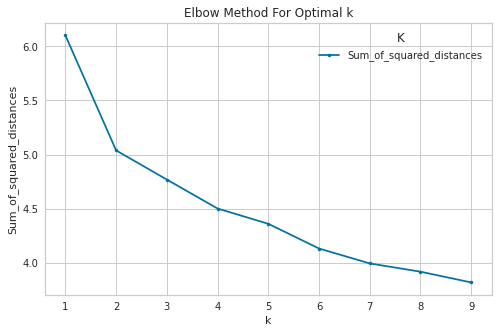

In [426]:
optimal_k.plot(kind = 'line', figsize = (8, 5), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


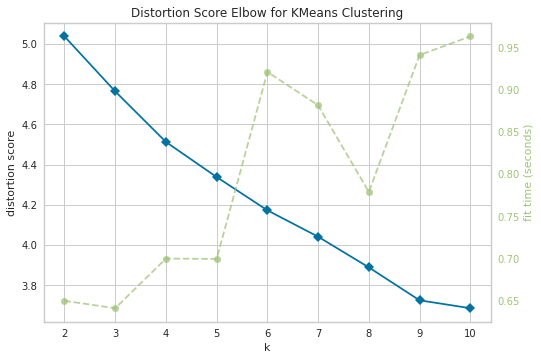

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [430]:
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show()

#### OK so here we 5 clusters could be the most optimal number of clusters, slight upward bend i the elbow method chart and cross hair in Elbow Visulizer
#### Note that the elbow is not very distinct which could indicate that the nieghborhoods are mostly similar in venue types indicating none cluster data set

# 2f. Examine the Clusters
#### Next we will exmine the clusters to observe the distinguishing categories of each cluster
#### We will assign each cluster a descriptive

#### Observing the below 5 clusters we can observes that all clusters have a fair offering of venues.  Nieghborhoods in the Greater Boston Area show to all have plenty of restaurants, bars and mix variety of retail.   Some Clusters show to have more parks than others, in contrary to others which may have more hotels and character of central locations.  We can clearly observe that caprates do not have significant corelationship to cluster type.  It really is a mixed bag and clear to see that relying on venues types as an indicator investablity is not reliable.

#### Following Kmeans clustering analysis we will further investigate venue counts of each nieghborhood as a means to measure rentable demand.  

### Cluster 0 - Parks, Gyms and Eating places
#### Cap rate in this cluster is varies widely and we can see no evidence of corelation

In [431]:
cap_merged.loc[cap_merged['Cluster Labels'] == 0, cap_merged.columns[[5,3,7] + list(range(8, cap_merged.shape[1]))]]

,AREA_TOWN,CAP_RATE,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
30,"Marina Bay, Quincy, MA",0.036209,42.300685,3.62,0,Harbor / Marina,Park,Dive Bar,Restaurant,Soccer Field
41,"Forestdale, Malden, MA",0.036692,42.438947,3.67,0,Gym,Wine Shop,Café,Liquor Store,Italian Restaurant
50,"West Cambridge, Cambridge, MA",0.038641,42.376816,3.86,0,Park,Boutique,Grocery Store,BBQ Joint,Gym
76,"Jamaica Plain's Forest Hills, Boston, MA",0.040334,42.294824,4.03,0,Park,Construction & Landscaping,Baseball Field,Garden,Clothing Store
85,"Roxbury's Fort Hill, Boston, MA",0.037691,42.326149,3.77,0,Park,Pizza Place,Metro Station,Gym,Intersection
87,"Roxbury, Boston, MA",0.037298,42.324843,3.73,0,Park,Gym,Metro Station,Rental Car Location,Caribbean Restaurant
91,"South Boston's City Point, Boston, MA",0.034751,42.333996,3.48,0,Park,Beach,Italian Restaurant,Breakfast Spot,Diner
105,"Dorchester's Savin Hill, Boston, MA",0.027526,42.309863,2.75,0,Park,Harbor / Marina,Pharmacy,Grocery Store,Vietnamese Restaurant


### Cluster 1 - Foodies and more
#### Cap rate in this cluster is varies widely and we can see no evidence of corelation, only two niegborhoods

In [432]:
cap_merged.loc[cap_merged['Cluster Labels'] == 1, cap_merged.columns[[5,3,7] + list(range(8, cap_merged.shape[1]))]]

,AREA_TOWN,CAP_RATE,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,"Winthrop Beach , Winthrop, MA",0.049299,42.377875,4.93,1,Italian Restaurant,Hotel,Gym,Deli / Bodega,Beach
2,"Winthrop, MA, Winthrop, MA",0.047139,42.374776,4.71,1,Bakery,Restaurant,Liquor Store,Gift Shop,Bank
3,"Cedarwood , Waltham, MA",0.052557,42.370930,5.26,1,Intersection,Restaurant,Donut Shop,Shopping Mall,Bagel Shop
4,"Waltham, MA, Waltham, MA",0.039311,42.374306,3.93,1,Italian Restaurant,Bar,Sushi Restaurant,Grocery Store,Mexican Restaurant
5,"South Waltham , Waltham, MA",0.035139,42.376485,3.51,1,Italian Restaurant,Sushi Restaurant,Grocery Store,Mexican Restaurant,Breakfast Spot
6,"Assembly Square, Somerville, MA",0.056295,42.392551,5.63,1,Clothing Store,Coffee Shop,Shoe Store,Sporting Goods Shop,Department Store
7,"Union Square, Somerville, MA",0.047308,42.379773,4.73,1,Peruvian Restaurant,Pizza Place,Indian Restaurant,Liquor Store,Café
8,"Magoun Square, Somerville, MA",0.040448,42.397361,4.04,1,Park,Pub,Bowling Alley,Donut Shop,Liquor Store
9,"Tufts University , Somerville, MA",0.034025,42.406292,3.40,1,Pizza Place,Italian Restaurant,Café,Ice Cream Shop,Middle Eastern Restaurant
10,"Ten Hills, Somerville, MA",0.033687,42.396763,3.37,1,Clothing Store,Park,Sporting Goods Shop,Donut Shop,Harbor / Marina


### Cluster 2 - Food, Parks, Shops, Zoo Exhibit, Home Service
#### Not enough neighborhoods in this cluster to consider corelation to cap rates

In [433]:
cap_merged.loc[cap_merged['Cluster Labels'] == 2, cap_merged.columns[[5,3,7] + list(range(8, cap_merged.shape[1]))]]

,AREA_TOWN,CAP_RATE,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
26,"Houghs Neck, Quincy, MA",0.050942,42.279266,5.09,2,Park,Zoo Exhibit,Eye Doctor,Donut Shop,Dry Cleaner
90,"West Roxbury, Boston, MA",0.035645,42.279265,3.56,2,Park,Home Service,Gym,Dog Run,Donut Shop


### Cluster 3 - Grab and Go: Pizza, Donut; Restaurants and some Bars and more
#### Cap rate in this cluster is varies widely and we can see no evidence of corelation

In [434]:
cap_merged.loc[cap_merged['Cluster Labels'] == 3, cap_merged.columns[[5,3,7] + list(range(8, cap_merged.shape[1]))]]

,AREA_TOWN,CAP_RATE,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,"Winter Hill, Somerville, MA",0.028324,42.395375,2.83,3,Pizza Place,Liquor Store,Pharmacy,Park,Plaza
21,"Revere Beach, Revere, MA",0.059189,42.418794,5.92,3,Pizza Place,Nightclub,Chinese Restaurant,Sports Bar,Mediterranean Restaurant
28,"Quincy Point, Quincy, MA",0.039179,42.245933,3.92,3,Bar,Ice Cream Shop,Pub,Pizza Place,Liquor Store
34,"Medford Hillside , Medford, MA",0.037369,42.412596,3.74,3,Pizza Place,Coffee Shop,Café,Donut Shop,Bus Stop
39,"Faulkner, Malden, MA",0.049701,42.429406,4.97,3,Park,Pizza Place,Sandwich Place,Hardware Store,Bus Stop
43,"Glendale , Everett, MA",0.050597,42.413986,5.06,3,Pizza Place,Donut Shop,Brazilian Restaurant,Health Food Store,Pharmacy
44,"Everett, MA, Everett, MA",0.049414,42.408430,4.94,3,Donut Shop,Pizza Place,Breakfast Spot,Grocery Store,Deli / Bodega
45,"West Everett , Everett, MA",0.036525,42.411208,3.65,3,Bakery,Pizza Place,Donut Shop,Brewery,Grocery Store
63,"Dorchester's Grove Hall, Boston, MA",0.074160,42.311209,7.42,3,Liquor Store,Pharmacy,Food,Supermarket,Donut Shop
69,"Hyde Park, Boston, MA",0.053630,42.256529,5.36,3,Pizza Place,Convenience Store,Grocery Store,Donut Shop,American Restaurant


### Cluster 4 - Beach, donut shops, Eateries and more
#### Only one Neighborhood in this cluster which is not enough to determine colrelation

In [435]:
cap_merged.loc[cap_merged['Cluster Labels'] == 4, cap_merged.columns[[5,3,7] + list(range(8, cap_merged.shape[1]))]]

,AREA_TOWN,CAP_RATE,GEO_LAT,CAP_RATE_FMT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Winthrop Highlands , Winthrop, MA",0.054497,42.387597,5.45,4,Liquor Store,Italian Restaurant,American Restaurant,Beach,Café
24,"Squantum, Quincy, MA",0.062006,42.295932,6.20,4,Donut Shop,Convenience Store,Café,Business Service,Beach


#### The above clusters are intesting points to note.  It could be useful when considering areas to aquire investment properites, however clearly we can see that expected returns are not corelated to venues clusters

# Days on the Market vs Number of Venues vs Cap Rates

#### Next we will look at number of venues in each neighborhoods.
#### We will see if any relationship exist in cap rate and number of venues.  Likely this is not that case as just seen in the above cluster analysis
#### Number a venues could also be used as a means to score desirablity to renters.  It is likely that renters would be more populas in areas with higher number of venues
#### We will compare number of venues by nieghboorhood vs average number of days to fill a rental vacany

In [436]:
caprate_df.head()

,AREA,TOWN,STATE,NO_BEDROOMS,RENT_DOM,RENTAL_COUNT,RENT_PRICE,SOLD_COUNT,SALE_PRICE,INSURANCE,UTILITIES,RENT_YRLY,MAINT_VACANCY,TAX_RATE,TAX,OPS_COST,NOI,CAP_RATE
0,Agassiz,"Cambridge, MA",MA,1,7.000,1,2400,1,600000,2400.0,380,28800,2880.0,0.00575,2932.50000,8592.50000,20207.50000,0.033679
1,Agassiz,"Cambridge, MA",MA,2,42.000,3,3900,2,830000,3320.0,760,46800,4680.0,0.00575,4056.62500,12816.62500,33983.37500,0.040944
2,Agassiz,"Cambridge, MA",MA,3,46.500,2,3900,1,1785000,7140.0,1140,46800,4680.0,0.00575,8724.18750,21684.18750,25115.81250,0.014070
3,Agassiz,"Cambridge, MA",MA,4,23.500,2,6250,2,1982500,7930.0,1520,75000,7500.0,0.00575,9689.46875,26639.46875,48360.53125,0.024394
4,Allston,"Boston, MA",MA,0,34.625,8,1402,1,265000,1060.0,0,16824,1682.4,0.01056,2378.64000,5121.04000,11702.96000,0.044162


In [437]:
cap_venues_pvt = pd.pivot_table(cap_venues, values=['Venue Category'], 
                                index=['Neighborhood'], 
                                aggfunc={'Venue Category': 'count'}).reset_index()

cap_venues_pvt.head()

,Neighborhood,Venue Category
0,"Agassiz, Cambridge, MA",43
1,"Allston, Boston, MA",100
2,"Assembly Square, Somerville, MA",97
3,"Avon Hill, Cambridge, MA",86
4,"Back Bay, Boston, MA",100


In [438]:
cap_ven_df = cap_df

cap_ven_df = (pd.merge(cap_ven_df,cap_venues_pvt, left_on='AREA_TOWN', right_on='Neighborhood')
                 .rename(columns={'Venue Category':'VENUE_COUNT'})
                 .drop('Neighborhood', axis=1))
        

cap_ven_df.head()

,AREA,TOWN,STATE,CAP_RATE,RENT_DOM,AREA_TOWN,GEO_LONG,GEO_LAT,CAP_RATE_FMT,VENUE_COUNT
0,Winthrop Highlands,"Winthrop, MA",MA,0.054497,30.000000,"Winthrop Highlands , Winthrop, MA",-70.971716,42.387597,5.449673,5
1,Winthrop Beach,"Winthrop, MA",MA,0.049299,92.000000,"Winthrop Beach , Winthrop, MA",-70.973105,42.377875,4.929911,15
2,"Winthrop, MA","Winthrop, MA",MA,0.047139,32.099405,"Winthrop, MA, Winthrop, MA",-70.986269,42.374776,4.713886,19
3,Cedarwood,"Waltham, MA",MA,0.052557,35.000000,"Cedarwood , Waltham, MA",-71.262557,42.370930,5.255679,11
4,"Waltham, MA","Waltham, MA",MA,0.039311,36.498091,"Waltham, MA, Waltham, MA",-71.235612,42.374306,3.931142,67


#### Now that we have combined the number of venues...
#### ...we will run regression analysis on venue count vs rental time on market

In [ ]:
#### run regression analysis

In [439]:
cap_ven_df[['CAP_RATE_FMT', 'VENUE_COUNT']].corr()

,CAP_RATE_FMT,VENUE_COUNT
CAP_RATE_FMT,1.000000,-0.378923
VENUE_COUNT,-0.378923,1.000000


In [440]:
cap_ven_df[['RENT_DOM', 'VENUE_COUNT']].corr()

,RENT_DOM,VENUE_COUNT
RENT_DOM,1.00000,0.03429
VENUE_COUNT,0.03429,1.00000


(0.0, 7.712320807802198)

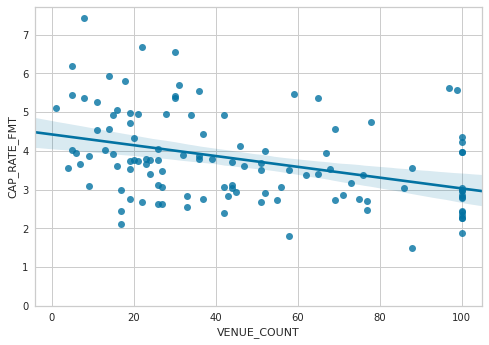

In [443]:
import seaborn as sns
sns.regplot(x="VENUE_COUNT", y="CAP_RATE_FMT", data=cap_ven_df)
plt.ylim(0,)

(0.0, 152.05)

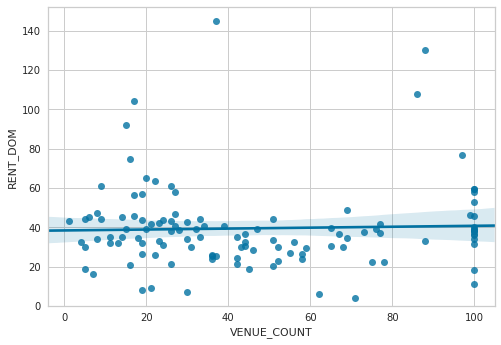

In [444]:
import seaborn as sns
sns.regplot(x="VENUE_COUNT", y="RENT_DOM", data=cap_ven_df)
plt.ylim(0,)

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

#### Again we do not see corelation between venue count vs cap rate or rental days on the market.
#### However this si still valuable information for an invester interested in aquiring rental property
#### Investors would be interested in knowing more regarding properties' surrounding nieghborhood.  Venue mix and count information is also useful to know to better understand potential renter's profile.

#### From a data Science percpective.  This analysis could be the begining to a very intersting study regarding rent values, vs home sale prices and both rental and home lisings time on market.  I will be looking forward to continuing this study.  The Foursquare Venue would become more of a for your information data point.  The central focus would be on collection mls data for further anlysis.